In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import mglearn

In [2]:
student_df=pd.read_csv("datasets/StudentsPerformance.csv")

In [3]:
student_df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [4]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
student_df.shape

(1000, 8)

In [6]:
student_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
columns=np.array(student_df.columns)

In [11]:
for feature in columns[0:5]:
    print(f"{feature}---> {np.unique(student_df[feature])}")

gender---> ['female' 'male']
race/ethnicity---> ['group A' 'group B' 'group C' 'group D' 'group E']
parental level of education---> ["associate's degree" "bachelor's degree" 'high school' "master's degree"
 'some college' 'some high school']
lunch---> ['free/reduced' 'standard']
test preparation course---> ['completed' 'none']


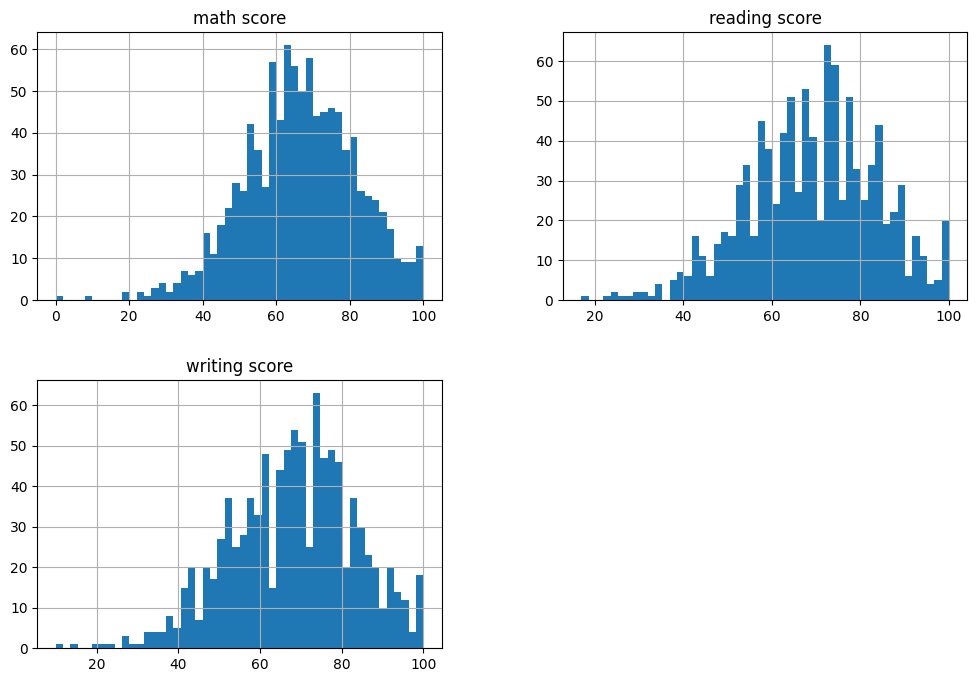

In [12]:
student_df.hist(bins=50,figsize=(12,8))
plt.show()

In [16]:
for feature in columns[0:5]:
    print(pd.Series(student_df[feature]).value_counts())
    print()

gender
female    518
male      482
Name: count, dtype: int64

race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

lunch
standard        645
free/reduced    355
Name: count, dtype: int64

test preparation course
none         642
completed    358
Name: count, dtype: int64



In [17]:
X=student_df.drop(columns='math score')
y=student_df['math score']

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [32]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

ct=ColumnTransformer(
    [("scaling",MinMaxScaler(),['reading score','writing score']),
     ("onehot",OneHotEncoder(sparse_output=False),['gender', 'race/ethnicity', 'parental level of education', 'lunch',  'test preparation course'])]
)

In [33]:
ct.fit(X_train)

,transformers,"[('scaling', ...), ('onehot', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,feature_range,"(0, ...)"
,copy,True
,clip,False


In [35]:
X_train_trans=ct.transform(X_train)
X_test_trans=ct.transform(X_test)

In [36]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt=GradientBoostingRegressor(max_depth=1,n_estimators=100)

In [37]:
gbrt.fit(X_train_trans,y_train)

,loss,'squared_error'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,1
,min_impurity_decrease,0.0
,init,None


In [38]:
print("Training Accuracy: {}".format(gbrt.score(X_train_trans,y_train)))

Training Accuracy: 0.8581611647806411


In [39]:
print("Testing Accuracy: {}".format(gbrt.score(X_test_trans,y_test)))

Testing Accuracy: 0.8272380808221481


ValueError: too many values to unpack (expected 1)

In [40]:
student_df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')